In [1]:
from qutip import *
import numpy as np

Setting parameters

In [2]:
# Defining the system Hamiltonian
Hsys = 0.5 * sigmaz()
# Initial state of the system.
rho0 = basis(2, 0) * basis(2, 0).dag()
tlist=np.linspace(0,10,100)
# defining Ohmic bath properties
alpha=0.05
T=1
wc=1
s=1


Obtaining an Ohmic Bath via Correlation functions

In [3]:
obp=heom.OhmicBath(T,sigmax(),alpha,wc,s)

In [4]:
obp.summary()

Fit correlation instance: 
 Results of the fitting the Real Part: 
 Parameters   lam      gamma      w0 
           -7.43e-02 -1.02e+00 4.53e-01 
           5.58e-01 -2.03e+00 2.09e-03 
           1.32e-02 -2.55e+00 3.41e+00 
          -7.29e-01 -2.13e+00 1.23e+00 
           1.17e-01 -1.98e+00 2.13e+00 
           1.48e-01 -1.55e+00 1.51e+00 
           2.66e-03 -2.58e-01 2.94e-08 
           2.02e-04 -5.82e-02 9.70e-221 
A  normalized RMSE of  9.658841e-07 was obtained for the real part 
Results of the fitting the Imaginary Part: 
 Parameters   lam      gamma      w0 
          -2.65e-02 -1.59e-01 1.70e-04 
           5.04e-03 -4.32e+00 4.58e+00 
          -3.30e-03 -1.94e+00 2.29e+00 
          -4.69e-02 -1.93e+00 8.50e-01 
          -5.15e-02 -4.81e-01 5.19e-03 
          -5.16e-02 -1.14e+00 1.38e-01 
A  normalized RMSE of 8.53e-07 was obtained for the imaginary part 



In [6]:
options = {'nsteps':15000, 'store_states':True, 'rtol':1e-12, 'atol':1e-12, 'method':"bdf"}
HEOM_corr_fit = heom.HEOMSolver(Hsys, obp.fit.Bath_corr, max_depth=4, options=options)
result_corr=HEOM_corr_fit.run(rho0,tlist)

10.1%. Run time:   2.54s. Est. time left: 00:00:00:22
20.2%. Run time:   3.76s. Est. time left: 00:00:00:14
30.3%. Run time:   4.70s. Est. time left: 00:00:00:10
40.4%. Run time:   5.92s. Est. time left: 00:00:00:08
50.5%. Run time:   6.86s. Est. time left: 00:00:00:06
60.6%. Run time:   7.79s. Est. time left: 00:00:00:05
70.7%. Run time:   8.72s. Est. time left: 00:00:00:03
80.8%. Run time:   9.67s. Est. time left: 00:00:00:02
90.9%. Run time:  10.43s. Est. time left: 00:00:00:01
100.0%. Run time:  11.00s. Est. time left: 00:00:00:00
Total run time:  11.00s


Obtaining an Ohmic Bath via Spectral density

If the spectral method is specified than the Ohmic bath is obtained by fitting the ohmic spectral density 

In [7]:
obp2=heom.OhmicBath(T,sigmax(),alpha,wc,s,Nk=4,method='spectral')

In [8]:
HEOM_spectral_fit = heom.HEOMSolver(Hsys, obp2.fit.Bath_spec, max_depth=4, options=options)
result_spectral=HEOM_spectral_fit.run(rho0,tlist)

10.1%. Run time:   1.51s. Est. time left: 00:00:00:13
20.2%. Run time:   2.24s. Est. time left: 00:00:00:08
30.3%. Run time:   3.22s. Est. time left: 00:00:00:07
40.4%. Run time:   3.94s. Est. time left: 00:00:00:05
50.5%. Run time:   4.75s. Est. time left: 00:00:00:04
60.6%. Run time:   5.43s. Est. time left: 00:00:00:03
70.7%. Run time:   6.15s. Est. time left: 00:00:00:02
80.8%. Run time:   6.92s. Est. time left: 00:00:00:01
90.9%. Run time:   7.76s. Est. time left: 00:00:00:00
100.0%. Run time:   8.49s. Est. time left: 00:00:00:00
Total run time:   8.49s


In [9]:
obp2.summary()

Fit Spectral instance: 
 Results of the fitting: 
 Parameters   lam      gamma      w0 
            7.59e-01  1.68e+00 1.00e-01 
          -9.90e-02  2.37e-01 1.00e-01 
           9.92e-02  2.37e-01 1.00e-01 
          -6.31e-02  4.22e+00 3.83e+00 
          -5.56e-01  1.64e+00 5.49e-01 
          -7.30e-02  1.10e+00 4.79e-01 
          -3.04e-03  3.82e+00 7.21e+00 
A  normalized RMSE of  8.790304e-07 was obtained for the real part 



Let us see the results from both ways of obtaining the ohmic bath parameters 

In [10]:
import matplotlib.pyplot as plt
def projection(result,i,j):
    return [result.states[k][i,j] for k in range(len(result.states))]

/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


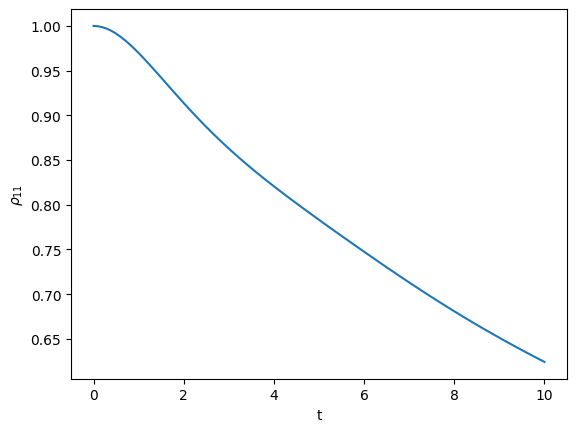

In [11]:
plt.plot(tlist,projection(result_spectral,0,0))
#plt.scatter(tlist,projection(result_corr,0,0),s=5,marker='x',color='red')
plt.xlabel('t')
plt.ylabel(r'$\rho_{11}$')
plt.show()

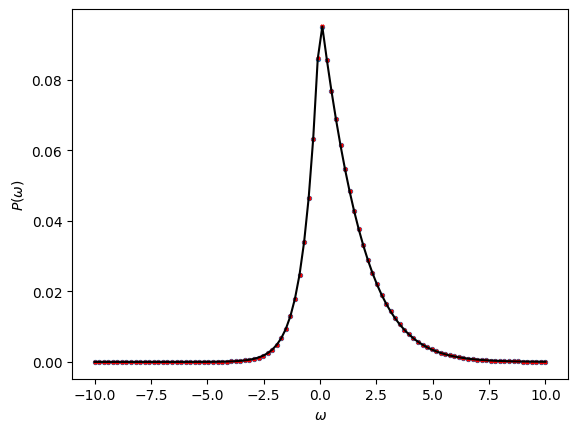

In [16]:
w=np.linspace(-10,10,100)
plt.scatter(w,obp.fit.corr_spectrum_approx(w),s=8)
plt.scatter(w,obp2.fit.spec_spectrum_approx(w),s=5,marker='x',color='red')
plt.plot(w,obp.ohmic_power_spectrum(w),color='k')
plt.ylabel(r'$P( \omega )$')
plt.xlabel(r'$\omega$')
plt.show()